In [1]:
import os 
import re 
import numpy as np
from scipy import ndimage, misc 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array
from osgeo import gdal

from skimage.transform import resize, rescale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2.12.0


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [25]:
SIZE=512
high_img = []
path = '/content/drive/MyDrive/Data/high'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for  img in files:
        #print(path+ " "+img)
        img = cv2.imread(path + '/'+img,-1)
        # open cv reads images in BGR format so we have to convert it to RGB
        #resizing image
        #img = cv2.resize(img, (SIZE, SIZE),interpolation=cv2.INTER_CUBIC)
        #print(path+ " "+img)
        if(type(img)=='NoneType'):
             break
        img=img.reshape((SIZE,SIZE,-1))
        img=tf.expand_dims(img,axis=0)
        high_img.append(img)
#print(len(high_img))


In [26]:
SIZE=512
low_img = []
path = '/content/drive/MyDrive/Data/low'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for  img in files:
        img = cv2.imread(path + '/'+img,-1)
        # open cv reads images in BGR format so we have to convert it to RGB
        #resizing image
        #img = cv2.resize(img, (SIZE, SIZE))
        img=img.reshape((4,4,-1))
        img=tf.expand_dims(img,axis=0)
        low_img.append(img)


In [27]:
def normalize(img):
  min_val=np.finfo(np.float32).max
  max_val=np.finfo(np.float32).min
  for i in range(len(img)):
    min_val=min(min_val,np.min(img[i]))
    max_val=max(max_val,np.max(img[i]))
  norm_img =[]
  for i in range(len(img)):
    norm_img.append(((img[i]-min_val)/(max_val-min_val)))
  
  return norm_img, min_val, max_val
  

In [28]:
n_low_img, min_low_img, max_low_img= normalize(low_img)
n_high_img, min_high_img, max_high_img= normalize(high_img)

In [29]:
def denorm(normalized_array, min_val, max_val):
    # calculate the range of the original values
    val_range = max_val - min_val
    
    # multiply the normalized values by the range
    denormalized_array = (normalized_array * val_range) + min_val
    
    return denormalized_array

In [30]:
x_train, x_test, y_train, y_test = train_test_split(n_low_img, n_high_img,test_size=200/1084)

In [11]:
def modelmtp(input):
    inputs=tf.keras.layers.Input(input)
    
    x=tf.keras.layers.Conv2DTranspose(8,2,2,padding="same",activation="relu")(inputs)
    x=tf.keras.layers.Conv2D(64,3,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)

    """
    x=tf.keras.layers.Conv2DTranspose(8,2,2,padding="same",activation="relu")(x)
    x=tf.keras.layers.Conv2D(64,3,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    """
    x=tf.keras.layers.Conv2DTranspose(8,2,2,padding="same",activation="relu")(x)
    x=tf.keras.layers.Conv2D(8,2,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)

    x=tf.keras.layers.Conv2DTranspose(8,2,2,padding="same",activation="relu")(x)
    x=tf.keras.layers.Conv2D(8,2,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)

    x=tf.keras.layers.Conv2DTranspose(8,2,2,padding="same",activation="relu")(x)
    x=tf.keras.layers.Conv2D(8,2,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)

    x=tf.keras.layers.Conv2DTranspose(8,2,2,padding="same",activation="relu")(x)
    x=tf.keras.layers.Conv2D(8,2,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)

    x=tf.keras.layers.Conv2DTranspose(8,2,2,padding="same",activation="relu")(x)
    x=tf.keras.layers.Conv2D(1,2,padding="same",activation="sigmoid")(x)
    
    modelmtp=tf.keras.Model(inputs,x)
    
    return modelmtp
    
    
    
    

In [85]:
def modelmtp(input):
    inputs=tf.keras.layers.Input(input)
    

    x=tf.image.resize(inputs, [512,512], method='bicubic')

    residual = x
    x = tf.keras.layers.Conv2D(64, 4, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.PReLU()(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([residual, x])
    x = tf.keras.layers.PReLU()(x)

    x=tf.keras.layers.Conv2D(8,3,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(8,3,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(8,3,padding="same")(x)
    x = tf.keras.layers.Add()([residual, x])
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)

    x=tf.keras.layers.Conv2D(8,3,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(8,3,padding="same")(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(8,3,padding="same")(x)
    x = tf.keras.layers.Add()([residual, x])
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)


    x=tf.keras.layers.Conv2D(1,2,padding="same",activation="sigmoid")(x)
    
    modelmtp=tf.keras.Model(inputs,x)
    
    return modelmtp
    
    
    
    

In [86]:
input_shape=(4,4,1)
newmodel=modelmtp(input_shape)

In [87]:
newmodel.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 4, 4, 1)]    0           []                               
                                                                                                  
 tf.image.resize_2 (TFOpLambda)  (None, 512, 512, 1)  0          ['input_8[0][0]']                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 512, 512, 64  1088        ['tf.image.resize_2[0][0]']      
                                )                                                                 
                                                                                                  
 batch_normalization_11 (BatchN  (None, 512, 512, 64  256        ['conv2d_17[0][0]']        

from tensorflow.keras import backend as K

def weigh_loss(y_true,y_pred):
  weights=K.flatten(y_true)
  l1=K.abs(y_true-y_pred)
  weig_l1=K.mean(l1*weights)
  return weig_l1

In [37]:
from tensorflow.keras import backend as K

def weigh_loss(y_true,y_pred):
  #weights=K.flatten(y_true)
  l1=K.abs(y_true-y_pred)
  weig_l1=K.mean(l1*y_true)
  return weig_l1

In [ ]:
def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )

In [89]:
newmodel.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [39]:
datain= tf.data.Dataset.from_tensor_slices((x_train,y_train))#[:]

In [40]:
for x,y in datain.take(10):
    #print(x[0])
    #print(y[0])
    print(x[0].shape)
    hh=newmodel.predict(x)
    #plt.imshow(x)
    #plt.imshow(y)
    break

(4, 4, 1)
1/1 [==============================] - 0s 429ms/step


In [ ]:
history=newmodel.fit( datain,batch_size=1,epochs=200,verbose=1)

Epoch 1/200
884/884 [==============================] - 71s 72ms/step - loss: 0.0700 - root_mean_squared_error: 0.2646
Epoch 2/200
884/884 [==============================] - 63s 72ms/step - loss: 0.0685 - root_mean_squared_error: 0.2617
Epoch 3/200
884/884 [==============================] - 64s 72ms/step - loss: 0.0657 - root_mean_squared_error: 0.2562
Epoch 4/200
884/884 [==============================] - 64s 73ms/step - loss: 0.0619 - root_mean_squared_error: 0.2487
Epoch 5/200
884/884 [==============================] - 64s 72ms/step - loss: 0.0582 - root_mean_squared_error: 0.2413
Epoch 6/200
884/884 [==============================] - 64s 72ms/step - loss: 0.0559 - root_mean_squared_error: 0.2364
Epoch 7/200
884/884 [==============================] - 64s 72ms/step - loss: 0.0530 - root_mean_squared_error: 0.2302
Epoch 8/200
884/884 [==============================] - 64s 72ms/step - loss: 0.0520 - root_mean_squared_error: 0.2279
Epoch 9/200
884/884 [==============================] - 6

In [83]:
hh=newmodel.predict(x_train[0])

1/1 [==============================] - 0s 36ms/step


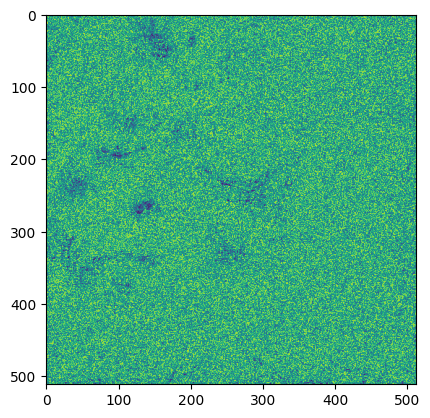

In [43]:
plt.imshow(y_train[0][0])

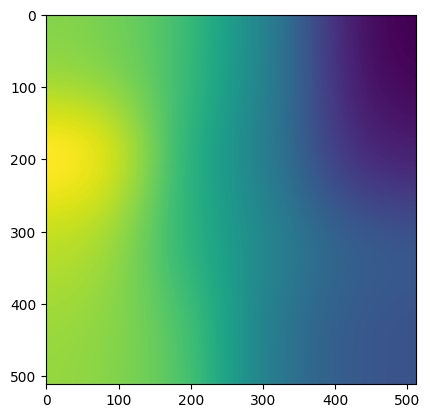

In [84]:
plt.imshow(hh[0])

In [ ]:
h_denorm=denorm(hh,min_high_img, max_high_img)

In [ ]:
print(h_denorm[0])

[[[3544.8003]
  [3483.0723]
  [3476.146 ]
  ...
  [3768.9224]
  [3723.4243]
  [3782.4023]]

 [[3603.3706]
  [3515.8022]
  [3541.5972]
  ...
  [3716.7124]
  [3743.857 ]
  [3809.247 ]]

 [[3615.2769]
  [3595.228 ]
  [3687.1973]
  ...
  [3732.545 ]
  [3847.7568]
  [3754.6128]]

 ...

 [[3933.102 ]
  [3852.275 ]
  [3598.5483]
  ...
  [3685.8125]
  [3726.3032]
  [3768.6235]]

 [[3907.2056]
  [3779.6328]
  [3419.0225]
  ...
  [3747.773 ]
  [3922.7402]
  [3812.168 ]]

 [[3813.5176]
  [3699.9521]
  [3491.5693]
  ...
  [3755.3062]
  [3810.7598]
  [3652.6704]]]


In [21]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [45]:
print('PSNR',PSNR(y_train[0][0],hh),'dB', "SSIM",tf.image.ssim(y_train[0][0],hh,max_val=1))

PSNR tf.Tensor(11.881462, shape=(), dtype=float32) dB SSIM tf.Tensor([0.02789466], shape=(1,), dtype=float32)


In [23]:
nn = tf.image.resize(x_train[0][0], [SIZE,SIZE], method='bicubic')
#print(x_train[0][0].shape)

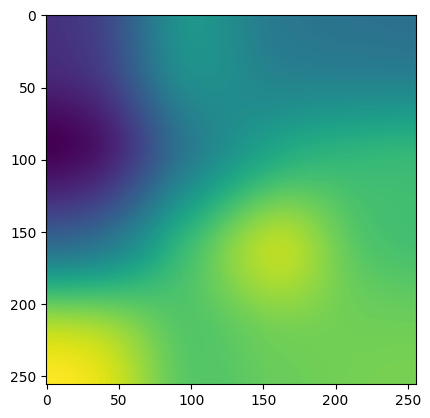

In [ ]:
plt.imshow(nn)

In [24]:
print('PSNR',PSNR(y_train[0][0],nn),'dB', "SSIM",tf.image.ssim(y_train[0][0],nn,max_val=1))

PSNR tf.Tensor(18.089895, shape=(), dtype=float32) dB SSIM tf.Tensor(0.11660641, shape=(), dtype=float32)


In [ ]:
from keras.models import load_model
newmodel.save("for256pxls.h5")
